
# Project: Exploring Hospital No-show Appointments 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#overview">Overview of the dataset</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## 1 Introduction

One of the operational issues the medical industry face is attendance to appointments to efficiently utilise the limited resources. Whether patients attend their appointments can depend on numerous factors, ranging from behavioural predispositions to unexpectancies in the environment (Nelson et al., 2019). By understanding what contribute to unattendance, the industry can intervene the behaviours to ensure resources are allocated responsibly. 


Patients no-show appointments can cause a huge financial burden on the hospital adminstration and can potentially cause delays in patients in need for urgent treatment. Investigating why patients did not show up for appointments is therefore important for us to understand, and thereby design operational strategies to relieve the challenge.

In the following, I will walk through the process of exploratory data anaylsis to better understand the contributing factors behind hospital no-shows. What are the characteristics of patients who did not attend the appointments? Do socioeconomic factors have effect on attending appointments? What measures did the hospital implemented helped with the problem?

<a id='overview'></a>
## 2 Overview of the dataset

The dataset is publicly available on Kaggle at *Medical Appointment No Shows* (https://www.kaggle.com/joniarroba/noshowappointments). 

In this medical appointment dataset, we see over 110k hospital appointments in state of Espirito Santo, Brazil, over the period of 2015 to 2016. 

### 2.1 What is in the dataset?
explain the meaning of the column

As the dataset in this project is quite tidy already, I will use the Define-Code-Test cleaning framework which is suitable when data quality issue is less complex. This framework means that I immediately clean the issue observed, instead of separating the assessment and cleaning process. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
%matplotlib inline 
# http://ipython.readthedocs.io/en/stable/interactive/magics.html

In [3]:
# load in the data for inspection
df = pd.read_csv('KaggleV2-May-2016.csv')

In [4]:
# quick check on the dataframe to make sure it was imported correctly
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# unify column names by following standard namings,
# so that it's easier manipulate columns later
labels = ['patient_id',
         'appointment_id',
         'gender',
         'scheduled_day',
         'appointment_day',
         'age',
         'neighbourhood',
         'scholarship',
         'hypertension',
         'diabetes',
         'alcoholism',
         'handicap',
         'sms',
         'no_show']

# replace the header column names
df = pd.read_csv('KaggleV2-May-2016.csv', header=0, names=labels)
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### 2.2 Data Dictionary

In [6]:
df.nunique()

patient_id          62299
appointment_id     110527
gender                  2
scheduled_day      103549
appointment_day        27
age                   104
neighbourhood          81
scholarship             2
hypertension            2
diabetes                2
alcoholism              2
handicap                5
sms                     2
no_show                 2
dtype: int64

**Observations from unique numbers and explanations:**


In this dataset, there are 62299 patients, they can have more than one appointments, leading to the **total number of appointments** be 110527. 


Patients are located in 81 different **neighborhoods**. 


Patients' pre-existing medical conditions are recorded as booleans (True or False), including **hypertension, diabetes, and alcholism**. There are 5 types of **handicap** conditions. 


**Scholarship** shows whether the patient receives financial aid from the government. 

**SMS** shows whether the patients received 1 or more messages from the hospital.

`no-show` dataset:
- **patient_id**: the unique identifier for each patient in the 
- **gender**: the assigned sex of each patient at birth (male or female)
- **scheduled_day**: the day of the actual appointment (date and time)
- **appointment_day**: the day when the appointment is made/registered (date)
- **age**: age of the patient
- **neighbourhood**: where the patient attend the appointment
- **scholarship**: whether or not the patient receives welfare
- **hypertension**: whether or not the patient has hypertension
- **diabetes**: whether or not the patient has diabetes
- **alcoholism**: whether or not the patient is alcoholic
- **handicap**: how many handicap the patient has (0-4)
- **sms**: whether or not the patient received sms reminder
- **no_show**: whether or not the patient showed up at the appointment

In [7]:
# check the total no of rows and columns 
df.shape

(110527, 14)

In [8]:
# check for row duplicates
sum(df.duplicated())

0

In [9]:
# inspect datatypes, any null values, missing data or erroneous data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms                110527 non-null int64
no_show            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**Observation:** 
- Each rows are complete with values, i.e. there is no missing or null values. 
- PatientId needs to be changed from float into int
- Some columns have datatypes as 'objects', need further investigation on the underlying data types


In [10]:
# show column name, column datatype, and the underlying datatype of the data
for col in df.columns:
    print(col, '|', df[col].dtypes, '|', type(df[col][0]),'\n')


patient_id | float64 | <class 'numpy.float64'> 

appointment_id | int64 | <class 'numpy.int64'> 

gender | object | <class 'str'> 

scheduled_day | object | <class 'str'> 

appointment_day | object | <class 'str'> 

age | int64 | <class 'numpy.int64'> 

neighbourhood | object | <class 'str'> 

scholarship | int64 | <class 'numpy.int64'> 

hypertension | int64 | <class 'numpy.int64'> 

diabetes | int64 | <class 'numpy.int64'> 

alcoholism | int64 | <class 'numpy.int64'> 

handicap | int64 | <class 'numpy.int64'> 

sms | int64 | <class 'numpy.int64'> 

no_show | object | <class 'str'> 



### 2.2 Next Steps

**To-do:**
- change no_show from string (yes and no) to int (0 and 1)
- change patient_id from float to int
- change gender from string (M and F) to int (0 and 1)
- change scheduled_day from string to datetime
- change appointment day from string to datetime


<a id='wrangling'></a>
## 3 Data Wrangling

### 3.1 Change data types to appropriate ones

In [11]:
# update the datatypes 
df.no_show = df.no_show.eq('Yes').mul(1)
df.patient_id = df.patient_id.astype(int)
df.gender = df.gender.eq('F').mul(1)
df.scheduled_day = pd.to_datetime(df['scheduled_day'])
df.appointment_day = pd.to_datetime(df['appointment_day'])

# confirm changes
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms,no_show
0,29872499824296,5642903,1,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,0,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,1,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,1,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,1,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [12]:
# confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null int64
appointment_id     110527 non-null int64
gender             110527 non-null int64
scheduled_day      110527 non-null datetime64[ns, UTC]
appointment_day    110527 non-null datetime64[ns, UTC]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms                110527 non-null int64
no_show            110527 non-null int64
dtypes: datetime64[ns, UTC](2), int64(11), object(1)
memory usage: 11.8+ MB


### 3.2  Check in details to understand the data

In [13]:
# check summary statistics 
df.describe()

,patient_id,appointment_id,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms,no_show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,0.649977,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,7.129575e+04,0.476979,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921700e+04,5.030230e+06,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,1.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


**Some initial observation that caught my attention:**

- minimum age is negative (-1)
- maximum age is very high (115)
- handicap is not binary, and maximum handicap value is 4

**Other observation:**
- on average patients receive sms reminder in 30% of all appointments  
- the dominant features of patients were (independently): not under scholarship, no hypertension, no diabetes, non-alcoholic, and with abled body.

### What is the time range?

In [14]:
max(df.scheduled_day)

Timestamp('2016-06-08 20:07:23+0000', tz='UTC')

In [15]:
min(df.scheduled_day)

Timestamp('2015-11-10 07:13:56+0000', tz='UTC')

### Can a patient have more than one appointment in this dataset? 

In [16]:
# find unique numbers of patients and appointments
no_of_patient =  df.patient_id.nunique()
no_of_appointment = df.appointment_id.nunique()

print(' No of patients:', no_of_patient, 
      '\n No of appointments:', no_of_appointment,
     '\n On average, one patient has {}'.format(round(no_of_appointment/no_of_patient, 2)), 'appointments.')


 No of patients: 62299 
 No of appointments: 110527 
 On average, one patient has 1.77 appointments.


Yes, patients can have more than one appointment.

### Why handicap values range from 0 to 4?

In [17]:
df.handicap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

It turns out that the values of *handicap* refer to the number of disabilities a patient has, according to the dataset <a href='https://www.kaggle.com/joniarroba/noshowappointments/discussion/29699'>creator</a> on Kaggle. 

A person can have more than one disabilities, such as a person with reduced hand mobility and reduced sight (handicap = 2).

### Why the minimum age is -1?

In [18]:
df[df['age'] == -1]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms,no_show
99832,465943158731293,5775010,1,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,0


From the Kaggle page, we know that -1 indicates non-birth infants as stated by the dataset creator. However, it was debatable that the appointments would record the age of the infant instead of the pregnant women, and have a column indicating pregancy. 

Based on the online discussion <a href = 'https://www.kaggle.com/joniarroba/noshowappointments/discussion/41457'>here</a>, the fact that the creator did not explain clearly what each attribute entails, that there is only one appointment with patient aged -1, and that the appointment was attended, I decided to drop this row of values.

### 3.3 Summary of data wrangling
- updated column labels for consistency
- turned True/False into 1, 0 
- updated datatypes

<a id='eda'></a>
## 4 Exploratory Data Analysis

Now that I've trimmed, cleaned and understood the data better, I'm ready to move on to exploration. 

Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. 


### 4.1 Single variable questions

### 4.1.1 How many no-show appointments are there? 

In [19]:
# calculate percentage of no-shows 
print(round((df.query('no_show == 1').no_show.count()/df.no_show.count())*100,2),'% of the appointments are no-show.')

20.19 % of the appointments are no-show.


In [20]:
# create the data for plotting
# df_pie = df.groupby(['no_show']).size()
df_pie = df.no_show.value_counts()
df_pie.head()

0    88208
1    22319
Name: no_show, dtype: int64

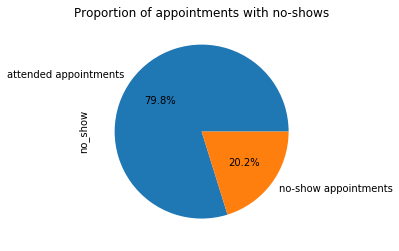

In [21]:
# plot pie chart
df_pie.plot.pie(title='Proportion of appointments with no-shows', autopct='%1.1f%%', labels=['attended appointments','no-show appointments']);

### 4.1.2 How many no-show patients are there? 

In [22]:
# no of unique no-show patients 
no_of_no_show_patients = df.query('no_show == 1').patient_id.nunique()
no_of_show_patients = df.query('no_show == 0').patient_id.nunique()

print('no of patients who did not attend: ', no_of_no_show_patients)
print('no of patients who did attend: ', no_of_show_patients)

# calculate the percentage of patients who have no-shows at least once
print('\n', round((no_of_no_show_patients/df.patient_id.nunique())*100,2),'% of the patients have not showed up on appointment for at least once.')

no of patients who did not attend:  17663
no of patients who did attend:  54154

 28.35 % of the patients have not showed up on appointment for at least once.


### 4.1.3 On average how many appointments a 'no-show patient' did not turn up?

In [23]:
df.query('no_show == 1').no_show.count()/ no_of_no_show_patients

1.263601879635396

I categorise the attributes into 3 main areas, namely demographic, medical conditions, and appointment-specific attributes.

##### Demographic attributes:
gender, age, scholarship, neighborhood

##### Medical condition attributes:
hypertension, diabetes, alcoholism, handicap.

##### Appointment-specific attributes: 
scheduled_day, appointment_day, sms, no_show

      
The EDA below will follow these 3 main areas for further investigation


### RQ1: How does demographic attributes influence whether or not a patient will show up for their scheduled appointment?

#### 1.1a No of appointments by neighborhood

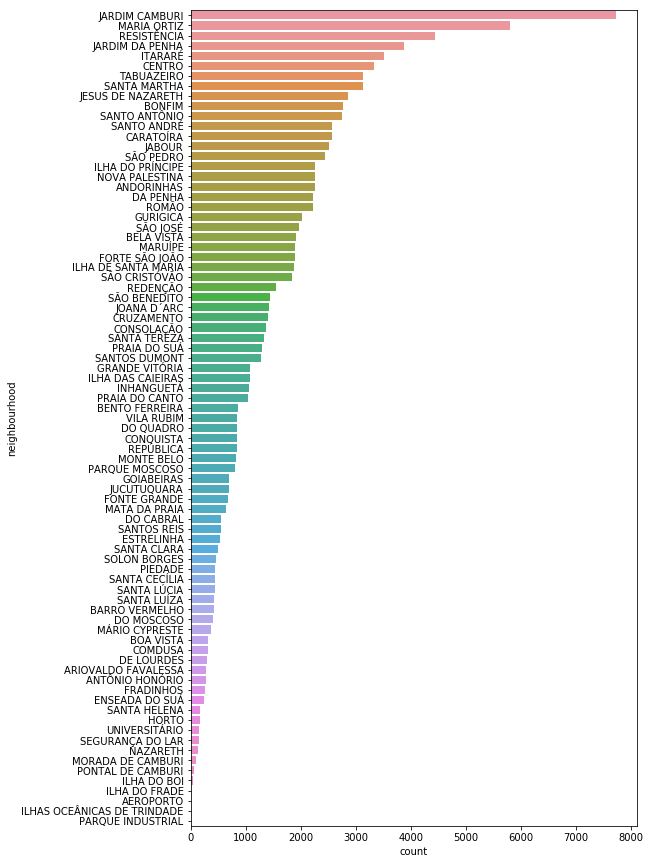

In [24]:
# get order of bars by frequency
neig_counts = df['neighbourhood'].value_counts()
neig_order = neig_counts.index
plt.figure(figsize=(8,15))
sb.countplot(data=df, y='neighbourhood', order=neig_order);

**Observation:** Most appointments are with patients from Jardin Camburi (almost 8000 appointments). 

#### 1.1b No of no-show appointments by neighborhood

In [25]:
# neighbourhood = df['patient_id', 'neighbourhood']
no_show_neigh = df[df.no_show==1]['neighbourhood'].groupby(df.neighbourhood)
# type(no_show_neigh)
# no_show_neigh = no_show_neigh.value_counts()
# df.neighbourhood.where(df['no_show']==1).dropna().value_counts()
# df.no_show.value_counts()

In [26]:
df['no_show_neigh'] = df.query('no_show == 1')['neighbourhood']
# df['no_show_neigh']

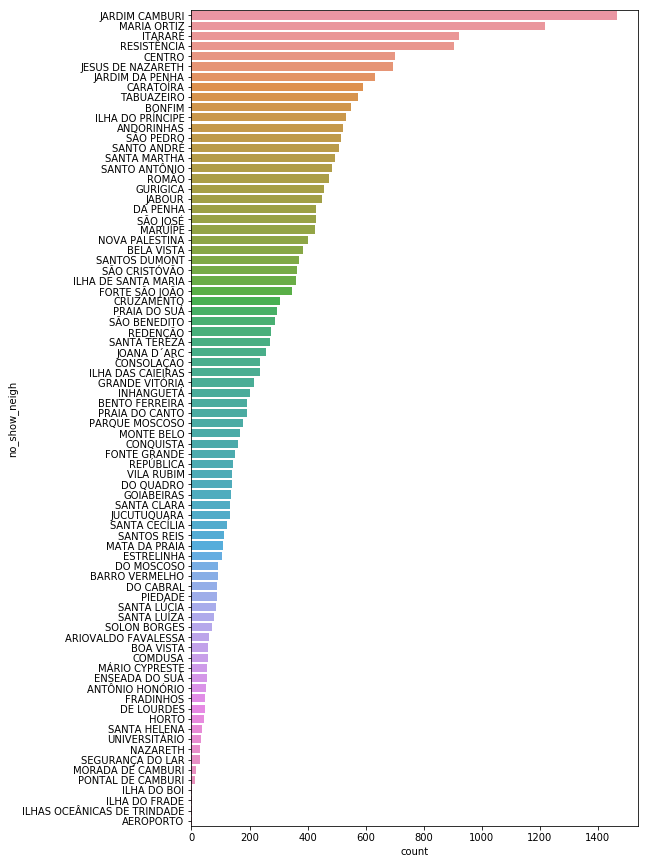

In [27]:
# get order of bars by frequency
no_show_neig_counts = df['no_show_neigh'].value_counts()
no_show_neig_order = no_show_neig_counts.index
plt.figure(figsize=(8,15))
sb.countplot(data=df, y='no_show_neigh', order=no_show_neig_order);

**Observation:** Most no-show appointments are from Jardin Camburi (more than 1400 appointments) and Maria Ortiz (~1200). This is the same ranking as the no of appointments by neighboourhood. But to be more useful to see which area have the largest proportion of appointments unattended, a bar charts by percentage is required.

#### 1.1c Percentage of no-show appointments by neighborhood

In [78]:
# create the column of percentage of no show appointments by neighbourhood
perc_neigh = df['no_show_neigh'].value_counts()/df['neighbourhood'].value_counts()

# sort the percentage into aescending order (bars will be displayed in descending order)
perc_neigh.sort_values(inplace=True)
perc_neigh.tail()

SANTA CLARA                    0.264822
SANTA CECÍLIA                  0.274554
SANTOS DUMONT                  0.289185
ILHAS OCEÂNICAS DE TRINDADE    1.000000
PARQUE INDUSTRIAL                   NaN
dtype: float64

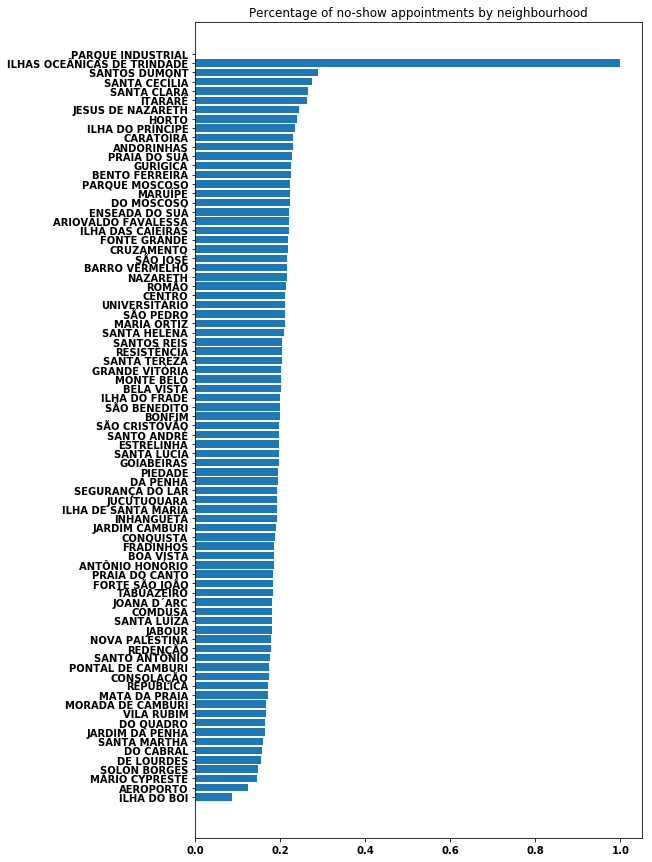

In [99]:
# get order of bars by frequency
# perc_neigh_counts = df['perc_neigh'].value_counts()
perc_neigh_order = perc_neigh.index
plt.figure(figsize=(8,15));
plt.barh(y=perc_neigh.index, width=perc_neigh.values);
plt.title('Percentage of no-show appointments by neighbourhood');
# sb.countplot(data=perc_neigh, y=perc_neigh, order=perc_neigh_order);

Turns out the neighbourhood with high numbers of no-show appointments were also with the high no of appointments inherently. Although all appointments in ILHAS OCEÂNICAS DE TRINDADE were unattended, there were only 2 appointments from that region.

In [82]:
# The no of unattended appointments in ILHAS OCEÂNICAS DE TRINDADE    
no_show_neig_counts['ILHAS OCEÂNICAS DE TRINDADE']

2

To combine the two charts into a stacked bar chart:

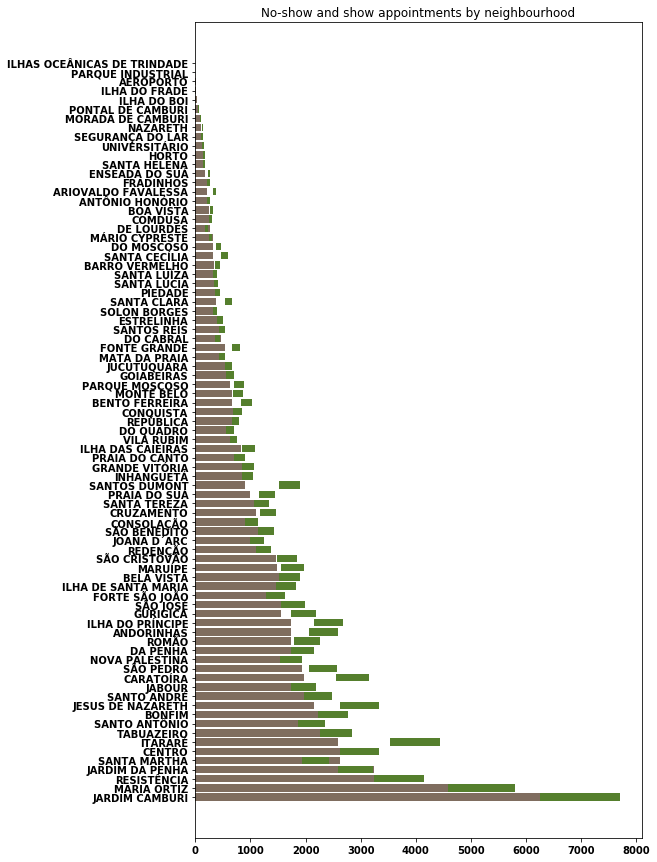

In [114]:
# values for no show 
# no_show_neig_counts

# values for show 
df['show_neigh'] = df.query('no_show == 0')['neighbourhood']
show_neig_counts = df['show_neigh'].value_counts()

# heights of bar-no-show + bar-show
bars = np.add(no_show_neig_counts, show_neig_counts).tolist()


# Create no-show bars
plt.figure(figsize=(8,15));
plt.title('No-show and show appointments by neighbourhood');
plt.barh(y=show_neig_counts.index, width= show_neig_counts.values,color='#7f6d5f');
plt.barh(y=no_show_neig_counts.index, left=show_neig_counts, width= no_show_neig_counts.values,color='#557f2d');

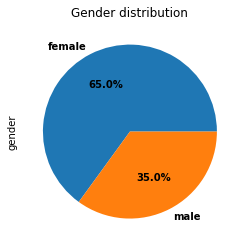

In [136]:
gender = df.gender.value_counts()
gender.plot.pie(title='Gender distribution', autopct='%1.1f%%', labels=['female','male']);

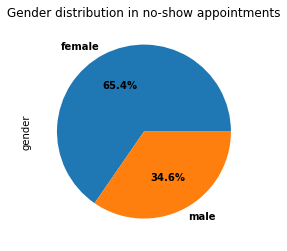

In [140]:
# no_show_gender = df.query('no_show==1').gender.value_counts().reset_index(name='no-show-gender')
# show_gender = df.query('no_show==0').gender.value_counts().reset_index(name='show-gender')
no_show_gender = df.query('no_show==1').gender.value_counts()
show_gender = df.query('no_show==0').gender.value_counts()
no_show_gender.plot.pie(title='Gender distribution in no-show appointments', autopct='%1.1f%%', labels=['female','male']);

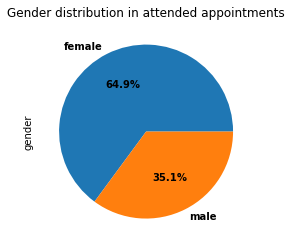

In [141]:
show_gender.plot.pie(title='Gender distribution in attended appointments', autopct='%1.1f%%', labels=['female','male']);

In [143]:
# calculate the percentage of no show appointments by gender
perc_gender = no_show_gender/(no_show_gender+show_gender)
perc_gender

1    0.203146
0    0.199679
Name: gender, dtype: float64

**Observations:**

Whether or not a patient attend an appointment does not seem to be affected by gender. This is because the all 3 pie charts show that female made up around 65% and make 35% of the population here.


### RQ2: How does medical condition attributes influence whether or not a patient will show up for their scheduled appointment?

### Plot the relative frequencies of categorical variables to no-show


In [ ]:

medical = ['hypertension', 'diabetes', 'alcoholism', 'handicap']
plt.figure(figsize=(14,28))
for i, value in enumerate(medical):
    plt.subplot(4, 2, i+1);
    sb.countplot(data = df, hue=value , x='no_show')

**Observations:**
- All of the proportions for no-show appointments are vaguely similar to attended appointments
- But there are complications, such as in SMS, the proportion of patients received SMS before the appointments but did not turn up seem to be larger than those who turned up for the appointment. We can investigate the correlation between sms and no-show further.

<a id='conclusions'></a>
## Conclusions

In this study, the relationship between demographic attributes and unattendance are investigated. 20.2% of the appointments were not attended by 28% of the patients in this dataset. Patients from certain neighbourhoods have higher no of unattended appointments. But those regions tend to be where there were higher no of appointments as well. It is believed that gender does not have an influence on appointment attendance as there is no trend observed. Further statistical tests needed to confirm the observations. Exploration on attributes such as medical conditions will reveal more.
